<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

### EXPLORATORY DATA ANALYSIS TERM 1 PROJECT  - BREAST CANCER DATASET ANALYSIS
                                                                                          - By Hariharen LMG, Mar'19 batch

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading](#section2)
3. Data Profiling
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
    - 3.4 [Post Profiling](#section304)<br/>
4. Questions
    - 4.1 [Among the patients, how Age, Pos_axillary_nodes and Year are distributed?](#section401)<br/>
    - 4.2 [Identifying any correlation between the variables using pairplot and heatmap?](#section402)<br/>
    - 4.3 [Analyzing the Patients who survived >5 years against each columns using Bivariate and Multivariate plots](#section403)<br/>
    - 4.4 [Is any pattern of Age and Pos_axillary_nodes can be traced w.r.t. Years_of_operation](#section404)<br/>
    - 4.5 [What is the survival and non survival age of patients w.r.t. each year?](#section405)<br/>
    - 4.6 [What is the survival and non survival of patients against Pos_axillary_nodes w.r.t. each year?](#section406)<br/>
    - 4.7 [What is the survival and non survival of patients against Age and Pos_axillary_nodes?](#section407)<br/>
    - 4.8 [Segment Age in bins with size 10 and Pos_axillary_nodes in bins with size 5](#section408)<br/>
    - 4.9 [Analyzing survival rate with Age_bin & Nodes_bin](#section409)<br/>
    - 4.10 [Analyzing survival rate with Years_of_operation against Age bins & Node bins](#section410)<br/>
    - 4.11 [Analyzing survival rate with another derived column Age_Node bin](#section411)<br/>
5. [Conclusions](#section5)<br/> 

<a id=section1></a>

### 1. Problem Statement

Identify the pattern of Breast Cancer Patients for survival more than 5 years from the available dataset

<a id=section2></a>

### 2. Data Loading the Breast_cancer_survival Dataset from Github

The dataset contains cases from a study that was conducted between 1958 and 1969 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer

Attribute Information:
    1. Age of patient at time of operation (numerical) 
    2. Patient's year of operation (year - 1900, numerical) 
    3. Number of positive axillary nodes detected (numerical) 
    4. Survival status (class attribute) 
        -- 1 = the patient survived 5 years or longer 
        -- 2 = the patient died within 5 year

In [1]:
# importing required packages for the project
import numpy as np                                               
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as mat     
import seaborn as sns   
%matplotlib inline
sns.set()

from subprocess import check_output

In [2]:
link1 = 'https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/Breast_cancer_survival.csv'
data1 = pd.read_csv(link1,encoding='utf-8')
data1.head()

,Age,Years_of_operation,Pos_axillary_nodes,Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


### 3. Data Profiling

<a id=section301></a>

### 3. 1 Understanding the Dataset

In [3]:
print(data1.shape)

(306, 4)


In [4]:
data1.columns

Index(['Age', 'Years_of_operation', 'Pos_axillary_nodes', 'Status'], dtype='object')

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age                   306 non-null int64
Years_of_operation    306 non-null int64
Pos_axillary_nodes    306 non-null int64
Status                306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [6]:
print(data1.isnull().sum())

data1.describe()

Age                   0
Years_of_operation    0
Pos_axillary_nodes    0
Status                0
dtype: int64


,Age,Years_of_operation,Pos_axillary_nodes,Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


<a id=section302></a>

### 3.2 Pre Profiling the data

In [7]:
profile = pp.ProfileReport(data1)
profile.to_file(outputfile="Breast_cancer_survival_preprocessing.html")

_Observations are_
1. __306 rows__ and __4 variables__ of __12 years__ data
2. __17 duplicated__ rows (differenet patients in the same year may observed with similar behaviour)
3. __Zero__ missing data
4. __44%__ of the patients have not noticed for any positive axillary nodes (means zero +ve axillary nodes)
5. __73.5%__ (225) of the patients have survived for 5 years and longer

<a id=section303></a>

### 3.3 Preprocessing

_Copying the original data to Temp DataFrame for analysis and study_

In [8]:
Temp1 = data1.copy()
Temp1['Years_of_operation'] = Temp1['Years_of_operation']+1900  # converting the Years_of_operation to the actual year value
Temp1.head()

,Age,Years_of_operation,Pos_axillary_nodes,Status
0,30,1964,1,1
1,30,1962,3,1
2,30,1965,0,1
3,31,1959,2,1
4,31,1965,4,1


In [9]:
Temp1[Temp1.duplicated()].groupby(['Years_of_operation']).count()       # 17 duplicate rows

,Age,Pos_axillary_nodes,Status
Years_of_operation,,,
1958,2,2,2
1959,2,2,2
1960,2,2,2
1961,2,2,2
1962,1,1,1
1963,2,2,2
1964,3,3,3
1965,1,1,1
1966,2,2,2


In [10]:
Temp2 = Temp1.copy()                      # Temp2 dataframe created by removing the duplicate rows of Temp1
Temp2.drop_duplicates(inplace=True)
Temp2.shape

(289, 4)

_For ease analysis - New column 'Status Died' added in Temp2 data frame for patients died within 5 years_

In [11]:
Temp2['Status_Died'] = Temp2.apply(lambda x: 1 if x['Status']==2  else 0,axis=1)
Temp2['Status']=Temp2['Status'].replace(2,0)
Temp2.rename(columns={'Status':'Status_Survived'},inplace=True)

In [12]:
Temp2.index = np.arange(289)            # To make sequence index after deletion of duplicate rows
Temp2.tail()            

,Age,Years_of_operation,Pos_axillary_nodes,Status_Survived,Status_Died
284,75,1962,1,1,0
285,76,1967,0,1,0
286,77,1965,3,1,0
287,78,1965,1,0,1
288,83,1958,2,0,1


To analyse the Survival pattern and for ease understanding, following changes did in the Temp2 copied data frame 
1. __Dropped__ the __duplicate__ rows and __index sequencing__ done (to avoid confusion in the profiling)
2. New column __Status_Died__ (within 5 years) is added with value __0 and 1__ for patients who survived >5 years and died within 5 years respectively

<a id=section304></a>

### 3.4 Post Profiling done with Temp2 derived DataFrame from Original

In [13]:
profile1 = pp.ProfileReport(Temp2)
profile1.to_file(outputfile="Breast_cancer_survival_postprocessing.html")

Observations are
1. __289 rows__ and __5 variables__ of 12 years data
2. __Zero duplicate__ row 
3. __Zero missing__ data
4. __42%__ of the patients have not noticed for any positive axillary nodes (means zero +ve axillary nodes)
5. __72.6%__ (210) of the patients have survived for 5 years and longer

### 4. Questions

<a id=section401></a>

### 4.1 Among the patients, how Age, Pos_axillary_nodes and Year are distributed?

52.45751633986928
No of Patients observed between Age group 40 ~ 70 is 252
Percentage of Patients observed between Age group 40 ~ 70 is  82.3529411764706 %


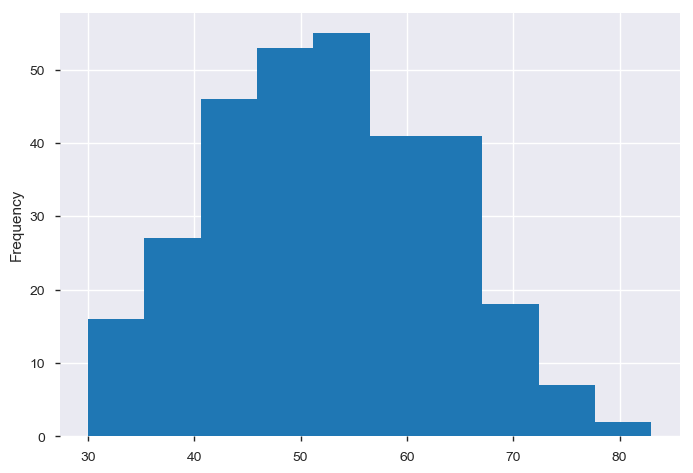

In [14]:
Temp1['Age'].plot.hist()
print(Temp1['Age'].mean())
print('No of Patients observed between Age group 40 ~ 70 is',Temp1[(Temp1['Age']>=40) & (Temp1['Age']<=70)]['Age'].count())
print('Percentage of Patients observed between Age group 40 ~ 70 is ', 
      len(Temp1[(Temp1['Age']>=40) & (Temp1['Age']<=70)])*100/len(Temp1), '%')

By seeing the __Age__ histogram, we can understand that many of the patients are in the age group of __40~70__ around __82%__.

Percentage of patients count in 1969 compared to 1958 is 30.555555555555557


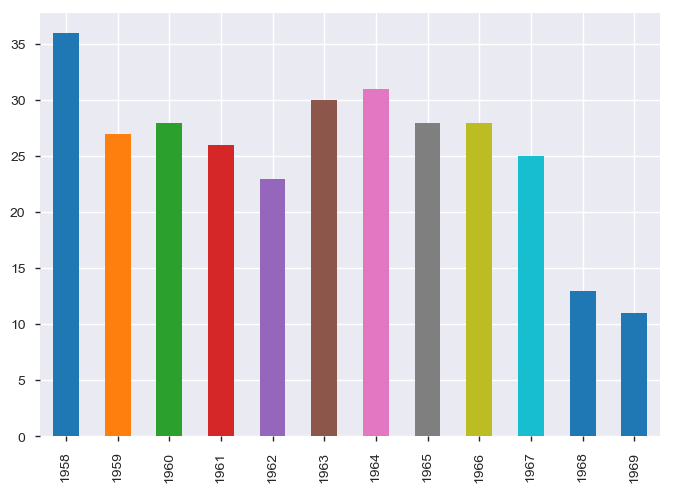

In [15]:
Temp1['Years_of_operation'].value_counts().sort_index().plot.bar()
print('Percentage of patients count in 1969 compared to 1958 is', len(Temp1[Temp1['Years_of_operation']==1969])*100/len(Temp1[Temp1['Years_of_operation']==1958]))

The above chart shows that the no. of Breast cancer patients have __reduced__ as years increasing (and in last 1968 & 1969, the no. of patients have much reduced to __30%__ compared to the 1958 year.                       
This may be due to                                                                                                   
__a)__ The increase of awareness in the population reduces the breast cancer patient or              
__b)__ The patients were approaching another hospital due to many other reason.                   
In this project we are focusing only to identify the pattern of patients who survived for 5 years and longer

Percentage of Patients not observed with any positive axillary nodes is  44.44444444444444 %, 136 out of 306


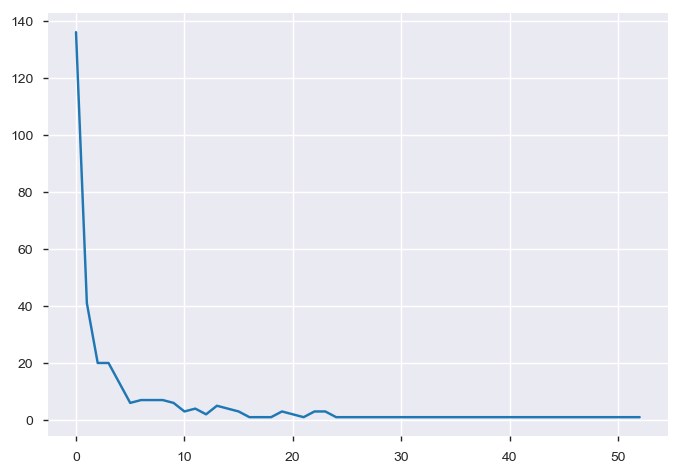

In [16]:
Temp1['Pos_axillary_nodes'].value_counts().sort_index().plot.line()
print('Percentage of Patients not observed with any positive axillary nodes is ', 
      len(Temp1[Temp1['Pos_axillary_nodes']==0])*100/len(Temp1['Pos_axillary_nodes']), '%,', len(Temp1[Temp1['Pos_axillary_nodes']==0]), 'out of 306')

Percentage of Patients observed with less than 10 positive axillary nodes is  86.9281045751634 %, 266 out of 306


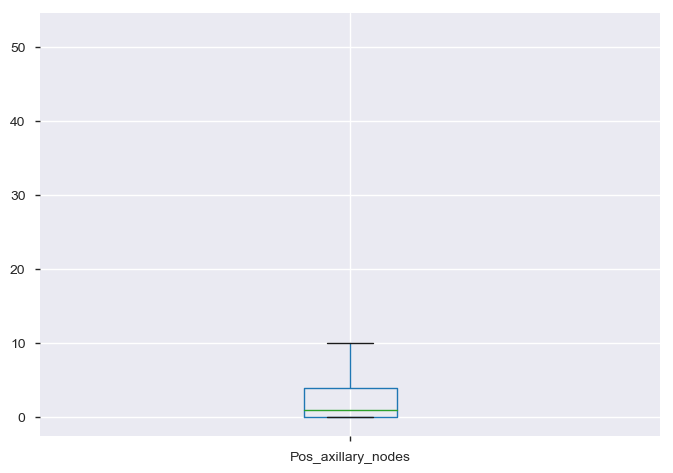

In [17]:
Temp1['Pos_axillary_nodes'].plot.box()
print('Percentage of Patients observed with less than 10 positive axillary nodes is ', 
      len(Temp1[Temp1['Pos_axillary_nodes']<=10])*100/len(Temp1['Pos_axillary_nodes']), '%,', len(Temp1[Temp1['Pos_axillary_nodes']<=10]), 'out of 306')

The box plot says that almost __87%__ patients are observed with __0 ~ 10__ positive axillary nodes

<a id=section402></a>

### 4.2 Identifying any correlation between the variables using pairplot and heatmap?

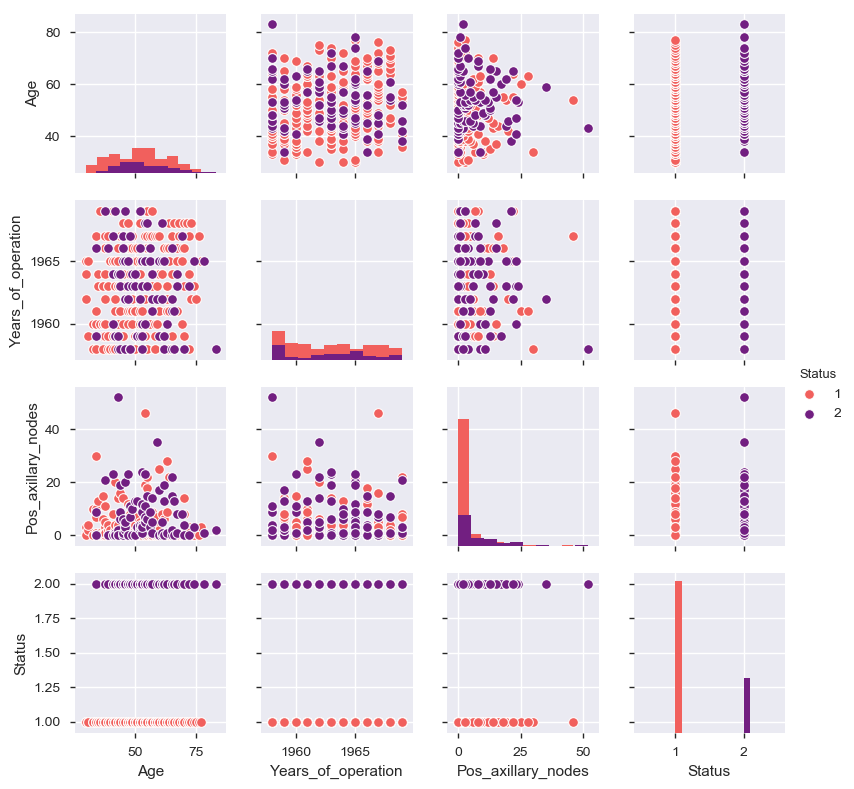

In [18]:
sns.pairplot(Temp1,hue='Status',palette='magma_r',diag_kind = 'hist',height=2)

Since the variables are __categorical__ in nature, __no clear__ observations are noticed in pairplot

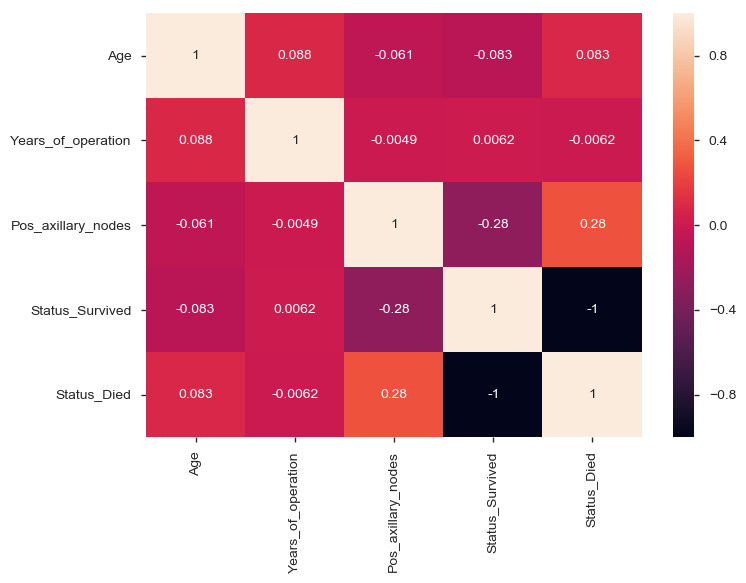

In [19]:
sns.heatmap(Temp2.corr(), annot=True)              # to understand the correlation

The small __-ve__ correlation observed between __positive axillary nodes__ and __Survival >5 years__

<a id=section403></a>

### 4.3 Analyzing the Patients who survived >5 years against each columns using Bivariate and Multivariate plots

Years_of_operation
1958    67.647059
1959    64.000000
1960    84.615385
1961    87.500000
1962    68.181818
1963    71.428571
1964    75.000000
1965    51.851852
1966    76.923077
1967    84.000000
1968    76.923077
1969    63.636364
Name: Status_Survived, dtype: float64

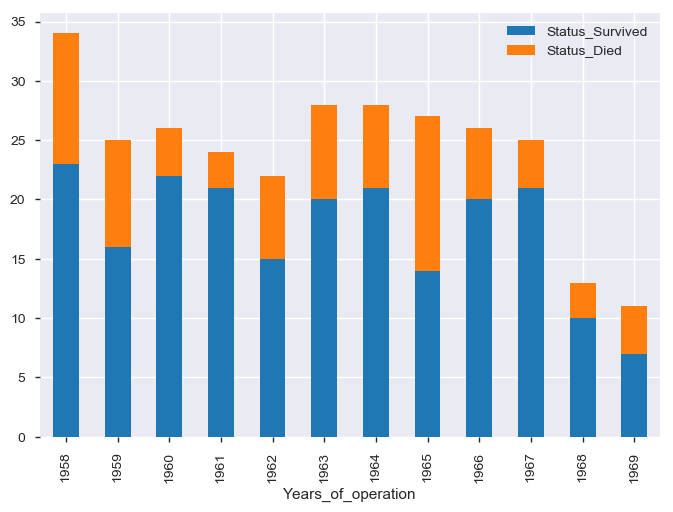

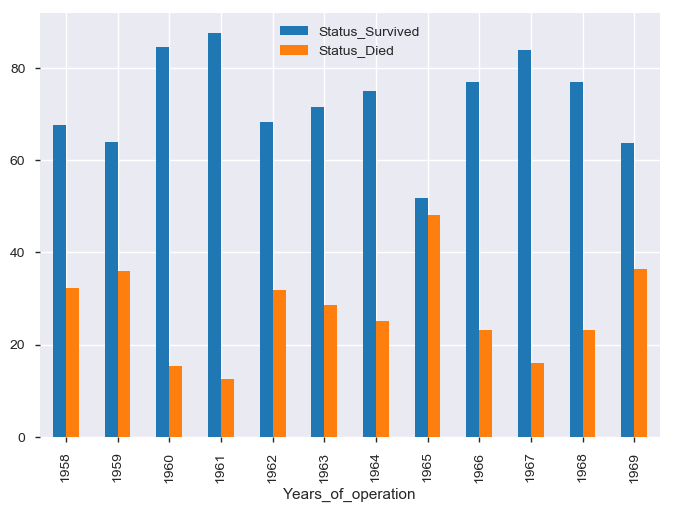

In [20]:
Temp2.groupby(['Years_of_operation'])['Status_Survived','Status_Died'].sum().plot.bar(stacked=True)
(Temp2.groupby(['Years_of_operation'])['Status_Survived','Status_Died'].mean()*100).plot.bar()      #percentage calculation
Temp2.groupby(['Years_of_operation'])['Status_Survived'].mean()*100

Survival more than 5 years percentage is __high (>=64%)__ compared to non survival in all years __except in year 1965__, where it is almost equal

In [21]:
Temp2[Temp2['Years_of_operation']==1965].loc[:,'Status_Survived':'Status_Died'].sum()

Status_Survived    14
Status_Died        13
dtype: int64

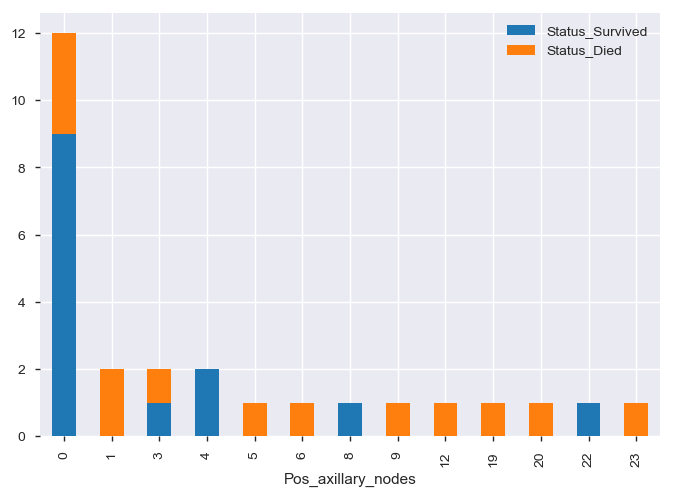

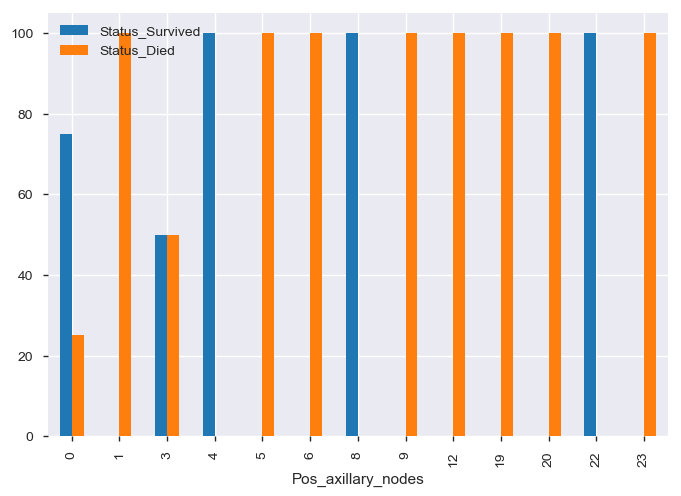

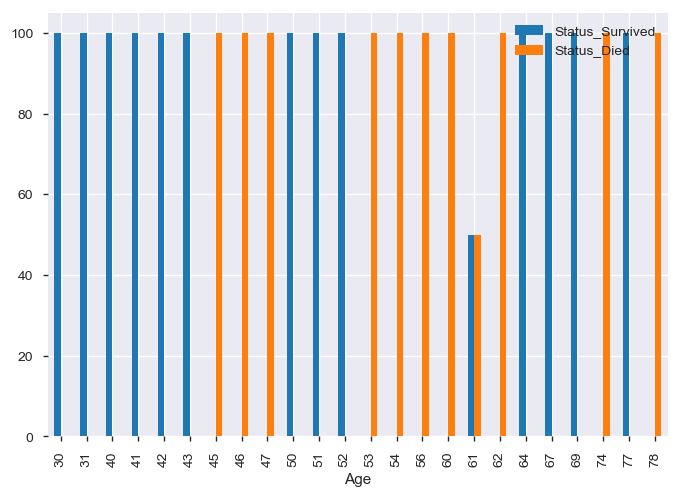

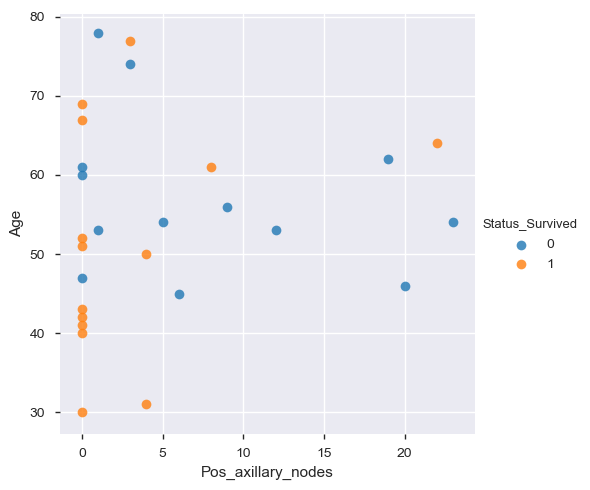

In [22]:
x=Temp2[Temp2['Years_of_operation']==1965].groupby(['Pos_axillary_nodes'])['Status_Survived','Status_Died']
x.sum().plot.bar(stacked=True)
(x.mean()*100).plot.bar()
((Temp2[Temp2['Years_of_operation']==1965].groupby(['Age'])['Status_Survived','Status_Died']).mean()*100).plot.bar()
sns.lmplot(x='Pos_axillary_nodes',y='Age',data=Temp2[Temp2['Years_of_operation']==1965],hue='Status_Survived',fit_reg=False)

Further checking the year __1965__ in detail between the __Age and +ve nodes__, and by observing the above plots,               
we can say the patients with __<5 +ve axillary nodes__ and __Age <=52__ have __high probability__ to survive more than 5 years

In [23]:
y = Temp2[(Temp2['Pos_axillary_nodes']<5) & (Temp2['Age']<=52)]
print('Total count:',len(y), 'Survived >5 yrs',y['Status_Survived'].sum(),'Percentage -', y['Status_Survived'].mean()*100)

y = Temp2[(Temp2['Pos_axillary_nodes']>=5) & (Temp2['Age']>52)]
print('Total count:',len(y), 'Survived >5 yrs',y['Status_Survived'].sum(),'Percentage -', y['Status_Survived'].mean()*100)

y = Temp2[(Temp2['Pos_axillary_nodes']>=5) & (Temp2['Age']<=52)]
print('Total count:',len(y), 'Survived >5 yrs',y['Status_Survived'].sum(),'Percentage -', y['Status_Survived'].mean()*100)

y = Temp2[(Temp2['Pos_axillary_nodes']<5) & (Temp2['Age']>52)]
print('Total count:',len(y), 'Survived >5 yrs',y['Status_Survived'].sum(),'Percentage -', y['Status_Survived'].mean()*100)

Total count: 112 Survived >5 yrs 91 Percentage - 81.25
Total count: 38 Survived >5 yrs 16 Percentage - 42.10526315789473
Total count: 37 Survived >5 yrs 21 Percentage - 56.75675675675676
Total count: 102 Survived >5 yrs 82 Percentage - 80.3921568627451


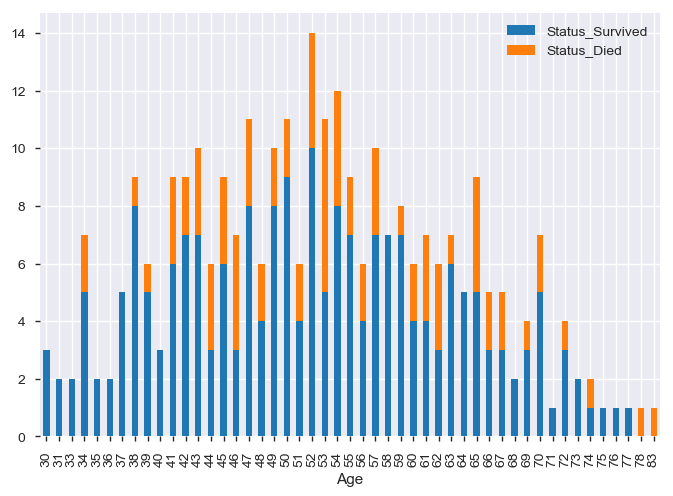

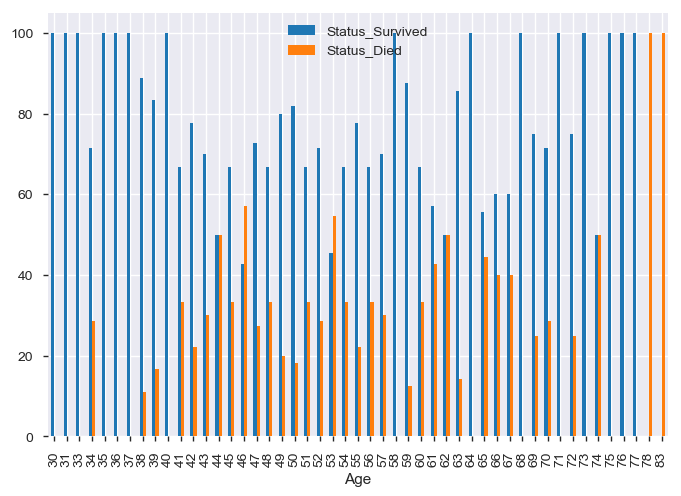

In [24]:
Temp2.groupby(['Age'])['Status_Survived','Status_Died'].sum().plot.bar(stacked=True)
(Temp2.groupby(['Age'])['Status_Survived','Status_Died'].mean()*100).plot.bar()  # percentage of survival w.r.t. Patient age

Unable to comment anything from the above __Age__ bar chart. Have to deep dive during multivariate analysis.

Pos_axillary_nodes
0     85.123967
1     80.000000
2     75.000000
3     65.000000
4     76.923077
5     33.333333
6     57.142857
7     71.428571
8     71.428571
9     33.333333
10    66.666667
Name: Status_Survived, dtype: float64

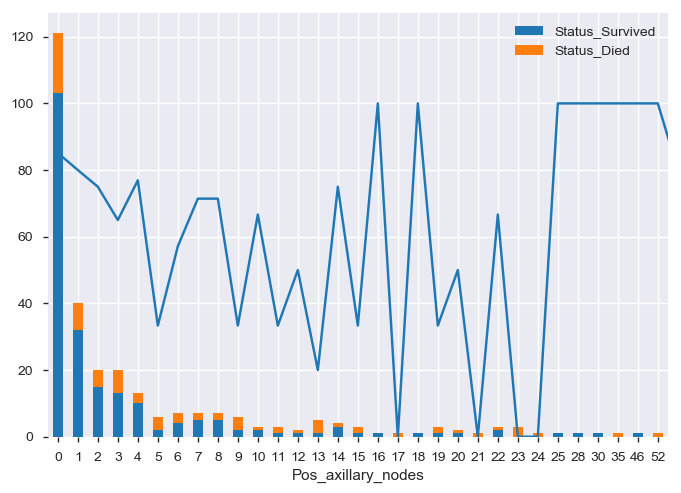

In [25]:
Temp2.groupby(['Pos_axillary_nodes'])['Status_Survived','Status_Died'].sum().plot.bar(stacked=True)
(Temp2.groupby(['Pos_axillary_nodes'])['Status_Survived'].mean()*100).plot.line()
Temp2[Temp2['Pos_axillary_nodes']<=10].groupby(['Pos_axillary_nodes'])['Status_Survived'].mean()*100

Here we can see as __Positive axillary nodes__ increases, the probability for survival more than 5 years __reduces__. Have to do further analysis with multivariate.

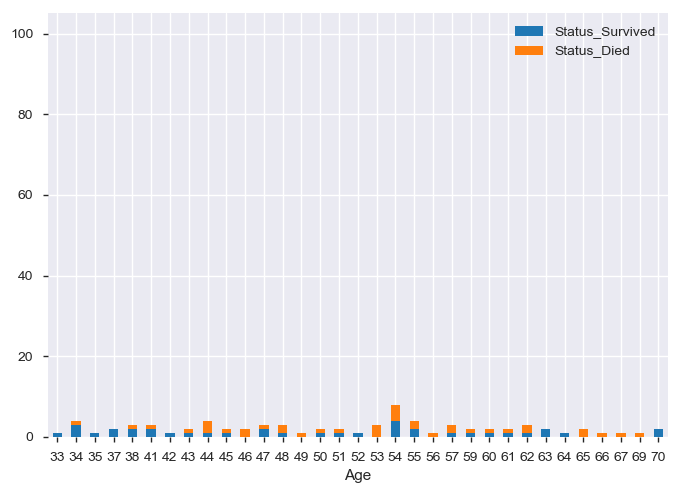

In [28]:
Temp2[Temp2['Pos_axillary_nodes']>=5].groupby(['Age'])['Status_Survived','Status_Died'].sum().plot.bar(stacked=True)

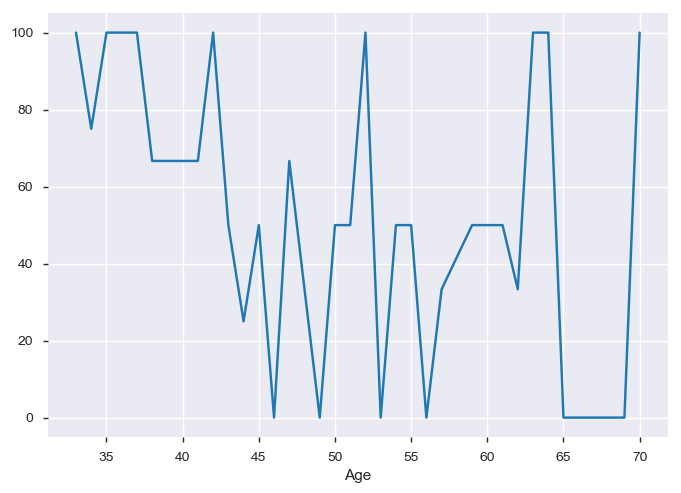

In [29]:
(Temp2[Temp2['Pos_axillary_nodes']>=5].groupby(['Age'])['Status_Survived'].mean()*100).plot.line()

<a id=section404></a>

### 4.4 Is any pattern of Age and Pos_axillary_nodes can be traced w.r.t. Years_of_operation?

C:\Users\Ruthraa\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


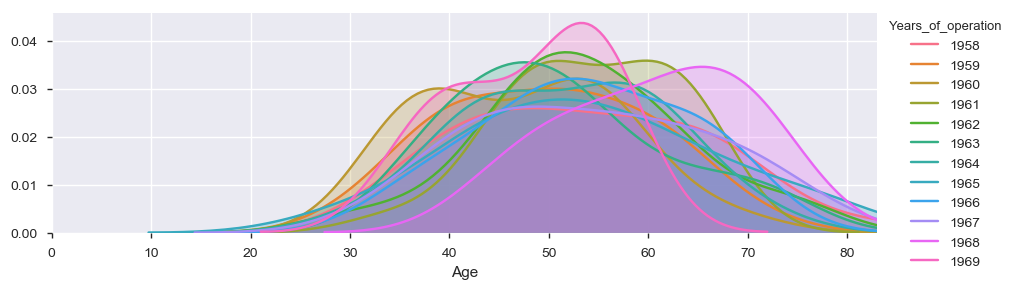

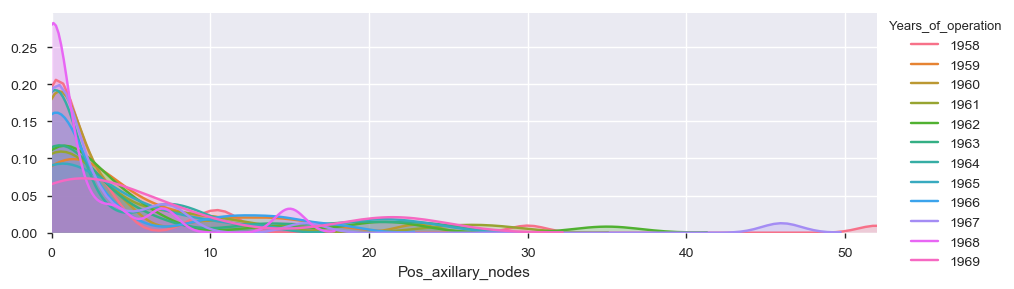

In [31]:
as_fig = sns.FacetGrid(Temp1,hue='Years_of_operation',aspect=3)
as_fig.map(sns.kdeplot,'Age',shade=True)
oldest = Temp1['Age'].max()
as_fig.set(xlim=(0,oldest))
as_fig.add_legend()

as_fig = sns.FacetGrid(Temp1,hue='Years_of_operation',aspect=3)
as_fig.map(sns.kdeplot,'Pos_axillary_nodes',shade=True)
oldest = Temp1['Pos_axillary_nodes'].max()
as_fig.set(xlim=(0,oldest))
as_fig.add_legend()

By observing the above facetgrid with Years of operation, we can understand that most of the __Patient's Age__ ranges between __35 to 70__ and __Positive axillary nodes__ observed ranges from __0 to 25__ and didn't find any trend.

<a id=section405></a>

### 4.5 What is the survival and non survival age of patients w.r.t. each year?

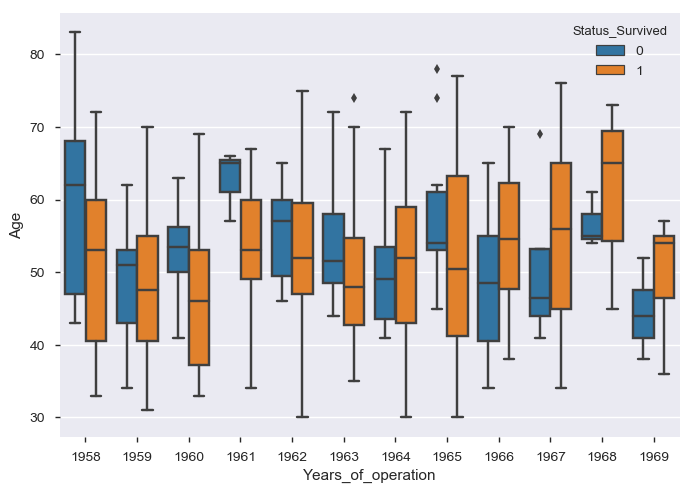

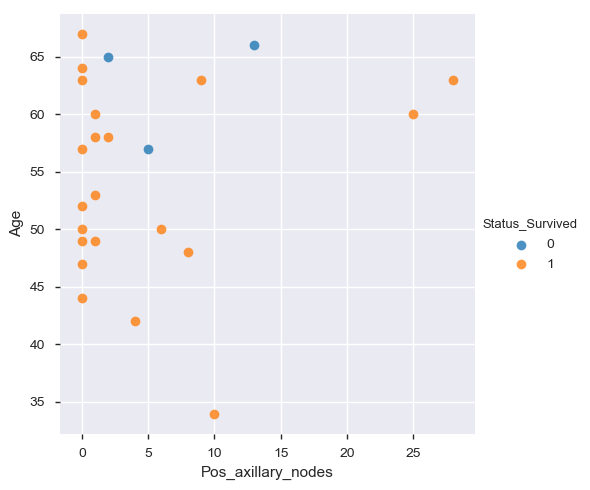

In [32]:
sns.boxplot('Years_of_operation','Age', 'Status_Survived', Temp2)
sns.lmplot(x='Pos_axillary_nodes',y='Age',data=Temp2[Temp2['Years_of_operation']==1961],hue='Status_Survived',fit_reg=False)

Within Every year the Median Age of Non Survival is __higher__ than the Median Age of Survival. Seems __lesser__ the age favours for the __Survival__. However the __reverse condition__ is observed in __second half__ of the dataset __(1964,1966~1969)__

Also if you see very deeply, __one unique case__ observed is __no overlapping__ in the box plot of __1961__ years of operation.
Then by studying the scatter plot of 1961 cases, it is __again__ observed that the Patients noticed with following combination have __high probability__ to survive >5 years
- __<5 +ve nodes__ and __Age <64 years__ 
- __>5 & <=10 +ve nodes__ and __Age <52 years__ 

Text(0.5, 1.0, 'Average Age and Pos_axillary nodes on years wise against Survival >5 years')

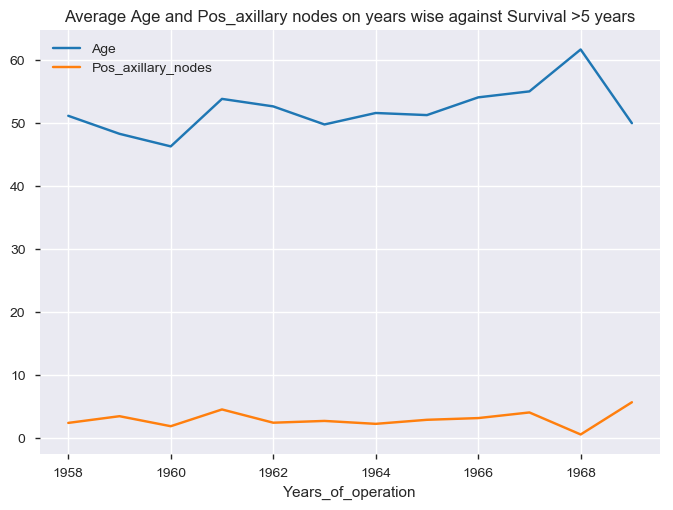

In [33]:
Temp2[Temp2['Status_Survived']==1].groupby(['Years_of_operation'])['Age','Pos_axillary_nodes'].mean().plot.line()
mat.title('Average Age and Pos_axillary nodes on years wise against Survival >5 years')

From the above line chart, we can see the __Age.mean__ line of Survial >5years is keep increasing in last 4 years. This may be due to more experience doctors were able to operate __critical cases__ (aged patient) __successfully__ eventhough the positive nodes of the patient noticed are increasing.

__By seeing the above study, it is clear that Age is not playing the vital role for the survival probability__.

<a id=section406></a>

### 4.6 What is the survival and non survival of patients against Pos_axillary_nodes w.r.t. each year?

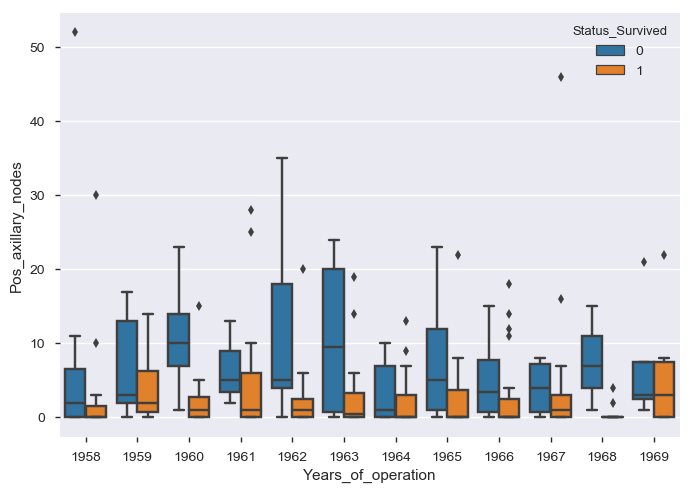

In [34]:
sns.boxplot('Years_of_operation','Pos_axillary_nodes', 'Status_Survived', Temp2)

Here again through this box plot it is very clear that the patients noticed with __lesser no. of +ve nodes__ (say <5 nodes) have __high probability__ for survival __>5 years__.

Percentage of Patients Survival >5 years  of those observed with less than 5 positive axillary nodes is  80.8411214953271 %


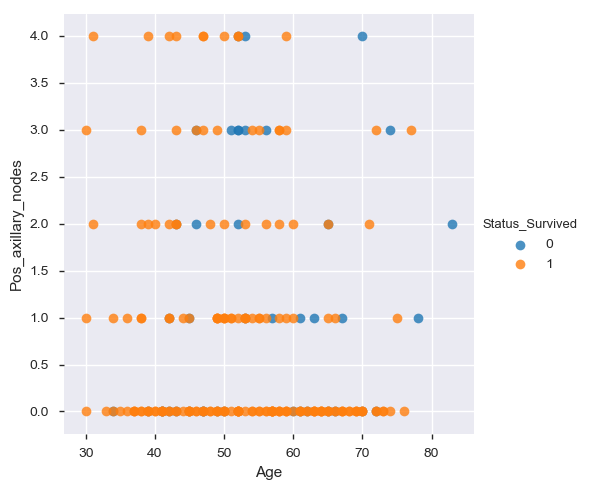

In [35]:
y=Temp2[Temp2['Pos_axillary_nodes']<5]
print('Percentage of Patients Survival >5 years  of those observed with less than 5 positive axillary nodes is ', 
      len(y[y["Status_Survived"]==1])*100/len(y), '%')
sns.lmplot(x='Age',y='Pos_axillary_nodes',data=Temp2[Temp2['Pos_axillary_nodes']<5],hue='Status_Survived',fit_reg=False)

From the above study it is very clear that the __81%__ of the patients who noticed with __<5 +ve axillary nodes__ have survived more than 5 years

In [36]:
y=Temp2[Temp2['Pos_axillary_nodes']>=5]
y=y[y['Pos_axillary_nodes']<10]
print('Percentage of Patients Survival >5 years of those observed with 5 ~ 10 positive axillary nodes is ', 
      len(y[y["Status_Survived"]==1])*100/len(y), '%')

y=Temp2[Temp2['Pos_axillary_nodes']>=10]
y=y[y['Pos_axillary_nodes']<25]
print('Percentage of Patients Survival >5 years of those observed with 10 ~ 25 positive axillary nodes is ', 
      len(y[y["Status_Survived"]==1])*100/len(y), '%')

y=Temp2[Temp2['Pos_axillary_nodes']>=25]
#y=y[y['Pos_axillary_nodes']<25]
print('Percentage of Patients Survival >5 years of those observed with >25 positive axillary nodes is ', 
      len(y[y["Status_Survived"]==1])*100/len(y), '%')

Percentage of Patients Survival >5 years of those observed with 5 ~ 10 positive axillary nodes is  54.54545454545455 %
Percentage of Patients Survival >5 years of those observed with 10 ~ 25 positive axillary nodes is  41.666666666666664 %
Percentage of Patients Survival >5 years of those observed with >25 positive axillary nodes is  66.66666666666667 %


As the __positive axillary nodes__ noticed with patient __increases__, their probability for __survival >5 years decreases__.

<a id=section407></a>

### 4.7 What is the survival and non survival of patients against Age and Pos_axillary_nodes?

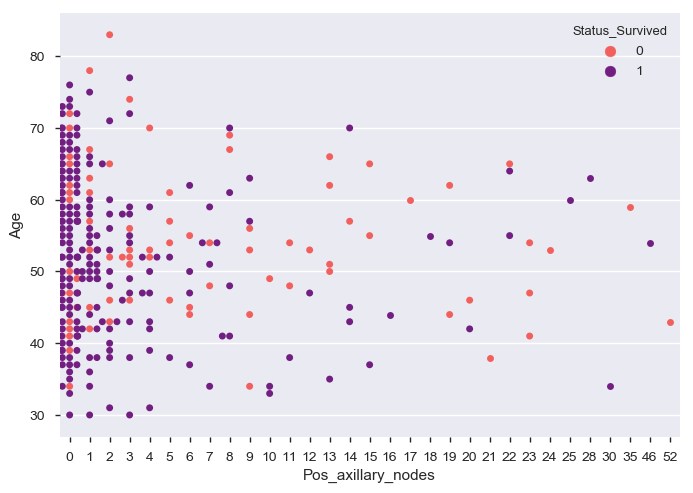

In [37]:
sns.swarmplot('Pos_axillary_nodes','Age','Status_Survived',Temp2, palette = 'magma_r')

From the swarm plot, it seems that as the __+ve nodes__ increase, the __Patient Age__ decreases for the __survival >5 years__ and viceversa.

<a id=section408></a>

### 4.8 Segment Age in bins with size 10 and Pos_axillary_nodes in bins with size 5.

In [38]:
for i in range(9,0,-1):
        Temp2.loc[Temp2['Age'] <= i*10, 'Age_bin'] = i
for i in range(11,0,-1):
        Temp2.loc[Temp2['Pos_axillary_nodes'] <= i*5, 'Nodes_bin'] = i
Temp2.tail()

,Age,Years_of_operation,Pos_axillary_nodes,Status_Survived,Status_Died,Age_bin,Nodes_bin
284,75,1962,1,1,0,8.0,1.0
285,76,1967,0,1,0,8.0,1.0
286,77,1965,3,1,0,8.0,1.0
287,78,1965,1,0,1,8.0,1.0
288,83,1958,2,0,1,9.0,1.0


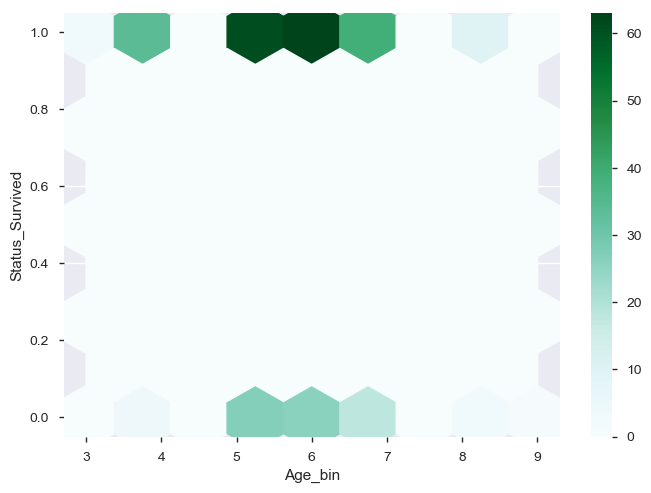

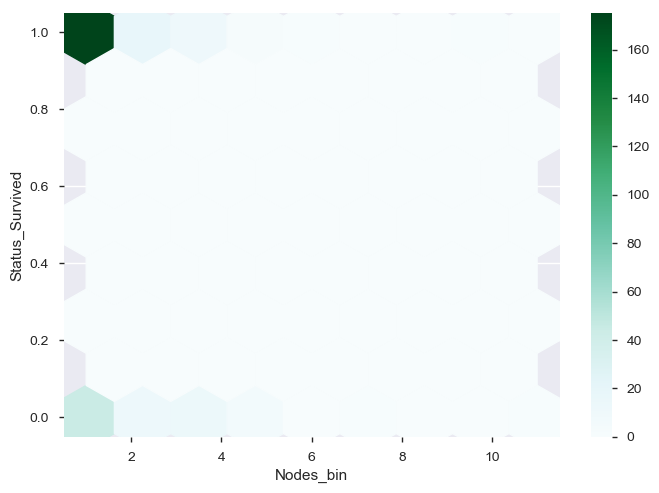

In [39]:
Temp2.plot.hexbin(x='Age_bin', y='Status_Survived', gridsize=8)
Temp2.plot.hexbin(x='Nodes_bin', y='Status_Survived', gridsize=8)

In [40]:
Temp2.groupby(['Age_bin']).count()

,Age,Years_of_operation,Pos_axillary_nodes,Status_Survived,Status_Died,Nodes_bin
Age_bin,,,,,,
3.0,3,3,3,3,3,3
4.0,38,38,38,38,38,38
5.0,88,88,88,88,88,88
6.0,89,89,89,89,89,89
7.0,57,57,57,57,57,57
8.0,13,13,13,13,13,13
9.0,1,1,1,1,1,1


In [41]:
Temp2.groupby(['Nodes_bin']).count()

,Age,Years_of_operation,Pos_axillary_nodes,Status_Survived,Status_Died,Age_bin
Nodes_bin,,,,,,
1.0,220,220,220,220,220,220
2.0,30,30,30,30,30,30
3.0,17,17,17,17,17,17
4.0,8,8,8,8,8,8
5.0,9,9,9,9,9,9
6.0,2,2,2,2,2,2
7.0,1,1,1,1,1,1
10.0,1,1,1,1,1,1
11.0,1,1,1,1,1,1


In all Age_bin, the survival >5 years is __more__ than the survival <5 years.
The __high density__ 80% of patients grouped in __Age_bin 5, 6 and 7__ ie Age 41~60.

The __high density__ 76% of patients grouped in __Nodes_bin 1 and 2__ ie Pos_axillary nodes <=10.

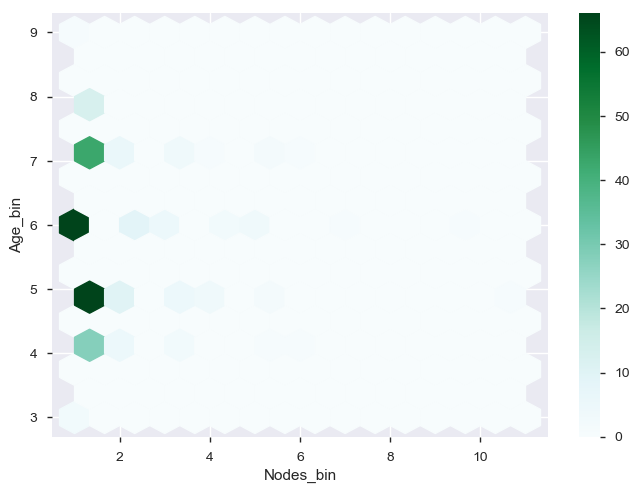

In [42]:
Temp2.plot.hexbin(x='Nodes_bin', y='Age_bin', gridsize=15)

In [43]:
y = Temp2[(Temp2.Age_bin >= 4)&(Temp2.Age_bin <=8)]
y = y[(y.Nodes_bin >= 1)&(y.Nodes_bin <=2)]
print(len(y), 'Which is ', len(y)*100/len(Temp2),'% of total population', len(Temp2))
print(y['Status_Survived'].mean()*100)   #190 have survived >5yrs - 77%
y['Years_of_operation'].value_counts()

246 Which is  85.12110726643598 % of total population 289
77.23577235772358


1958    30
1964    26
1967    23
1960    23
1963    22
1966    21
1965    21
1961    21
1959    21
1962    17
1968    12
1969     9
Name: Years_of_operation, dtype: int64

Most of the population lies in __Nodes_bin 1,2__ and in __Age_bins 4, 5, 6, 7, 8__ which is __85%__ (246) out of 289 patients.
Out of which the survival >5 years is __77%__.

<a id=section409></a>

### 4.9 Analyzing survival rate with Age_bin & Nodes_bin

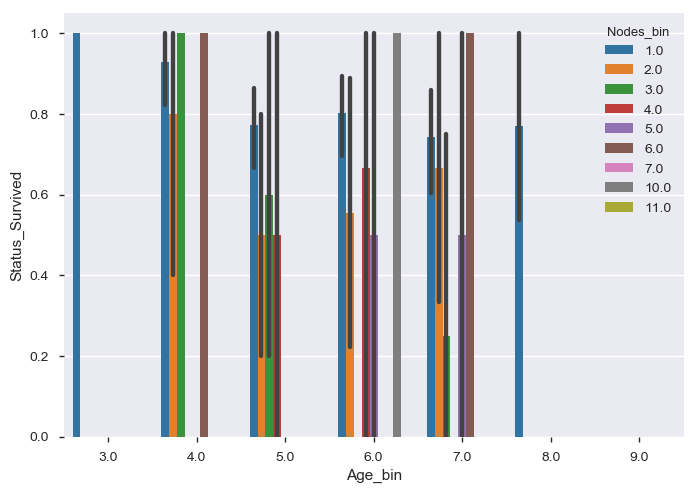

In [44]:
sns.barplot('Age_bin','Status_Survived',hue='Nodes_bin',data=Temp2)

Text(0.5, 1.0, 'Percentage of Survival >5 years by Age_bin')

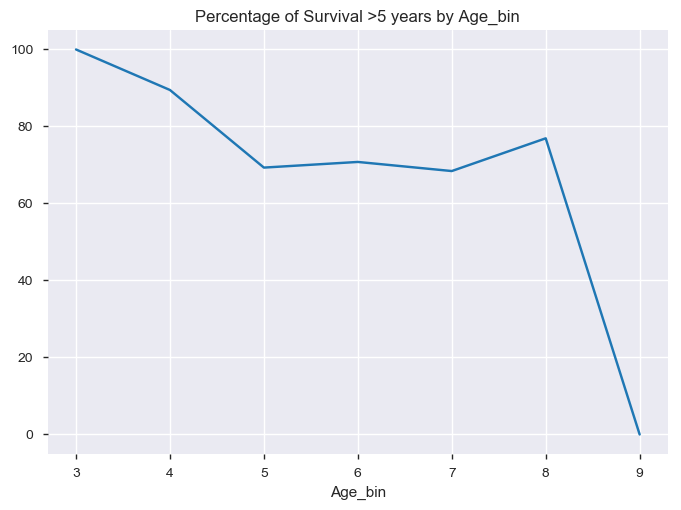

In [45]:
(Temp2.groupby(['Age_bin'])['Status_Survived'].mean()*100).plot.line()   # % of survival >5 years line chart as age increases
mat.title('Percentage of Survival >5 years by Age_bin')

Same Senerio observed, as __Age bin__ increases the opportunity of __Survival >5 years__ decreases

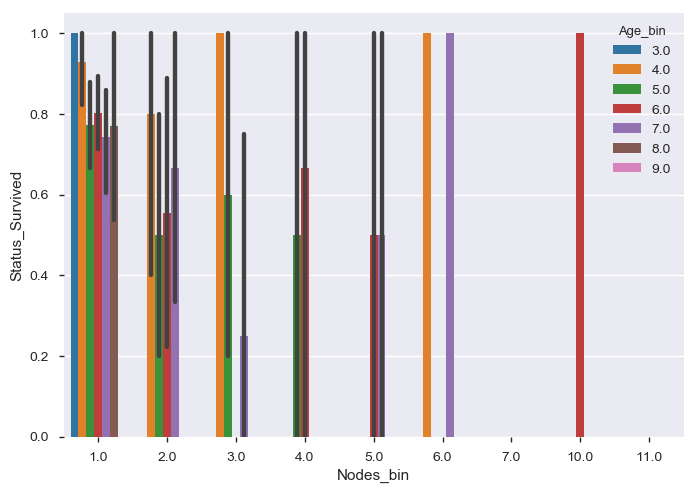

In [46]:
sns.barplot('Nodes_bin','Status_Survived',hue='Age_bin',data=Temp2)

Text(0.5, 1.0, 'Percentage of Survival >5 years by Nodes_bin')

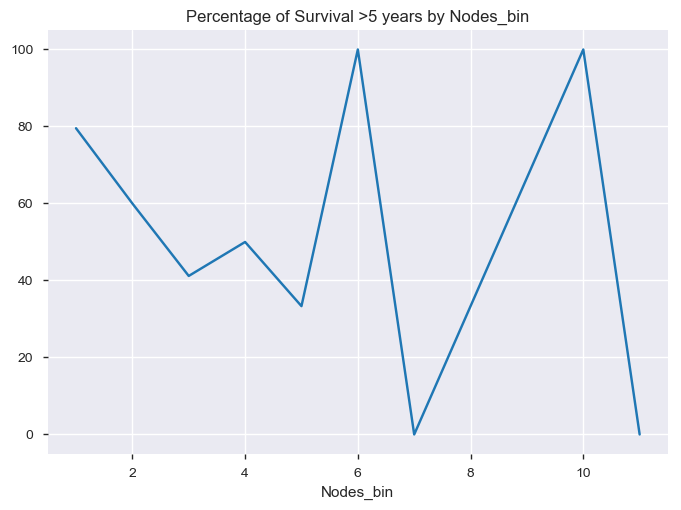

In [47]:
(Temp2.groupby(['Nodes_bin'])['Status_Survived'].mean()*100).plot.line()
mat.title('Percentage of Survival >5 years by Nodes_bin')

Same Senerio observed, as __Nodes bin__ increases the opportunity of __Survival >5 years__ decreases

In [48]:
pd.crosstab([Temp2.Age_bin, Temp2.Status_Survived], Temp2.Nodes_bin, margins=True).apply(lambda r: 100*r/len(Temp2), axis=1).style.background_gradient(cmap='autumn_r')

We can see how the __percentage of survival >5 years__ are varying depending on the __Age_bin and Nodes_bin__ the patients have.                                                 

250 Which is  86.50519031141869 % of total population 289
77.2


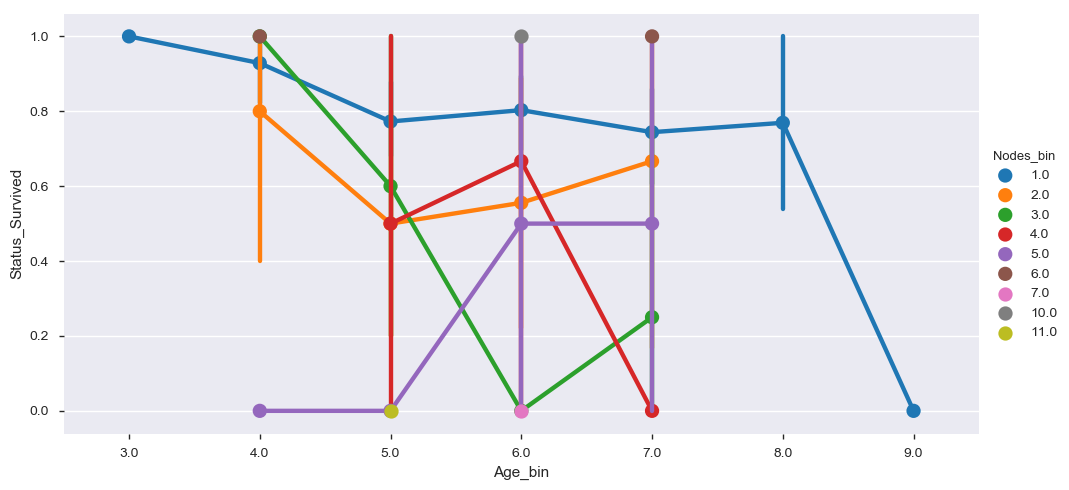

In [49]:
sns.catplot('Age_bin','Status_Survived',hue='Nodes_bin',kind='point',data=Temp2,aspect=2)

y = Temp2
y = y[(y.Nodes_bin >= 1)&(y.Nodes_bin <=2)]
print(len(y), 'Which is ', len(y)*100/len(Temp2),'% of total population', len(Temp2))
print(y['Status_Survived'].mean()*100)   #193 have survived >5yrs - 77%

Its clear from the above graph that among people of all the ages, __Nodes bin 1 & 2__ in general have __higher probability of survival >5 years__.                    
Patients count with __Nodes_bin 1 & 2__ is 250, which is 86.5% out of 289 patients. Out of which the survival >5 years is __77%__.

<a id=section410></a>

### 4.10 Analyzing survival rate with Years_of_operation against Age & Node bins

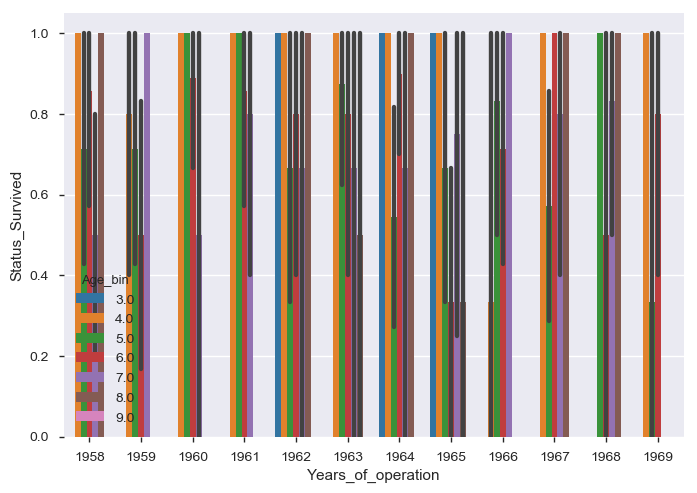

In [50]:
sns.barplot('Years_of_operation','Status_Survived',hue='Age_bin',data=y)

We can see as years increasing, __Age_bin #7__ success for __survival >5 years__ is also __increasing__ while all other Age_bins follow same trend in all years.

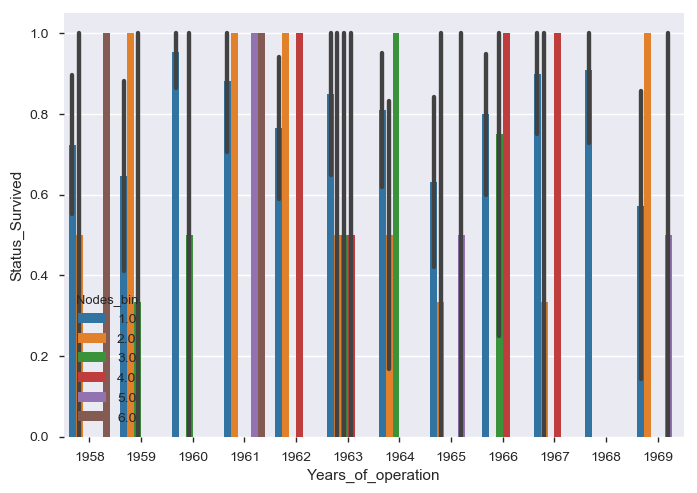

In [51]:
sns.barplot('Years_of_operation','Status_Survived',hue='Nodes_bin',data=Temp2[Temp2['Nodes_bin']<=6])

Here also we can see as years increasing, __Nodes_bin #3__ success for __survival >5 years__ is also __increasing__ while all other Nodes_bins follow same trend in all years.

Text(0.5, 1.0, 'Percentage of Survival >5 years Vs Years of operation for Age_bin=7 & Nodes_bin=3')

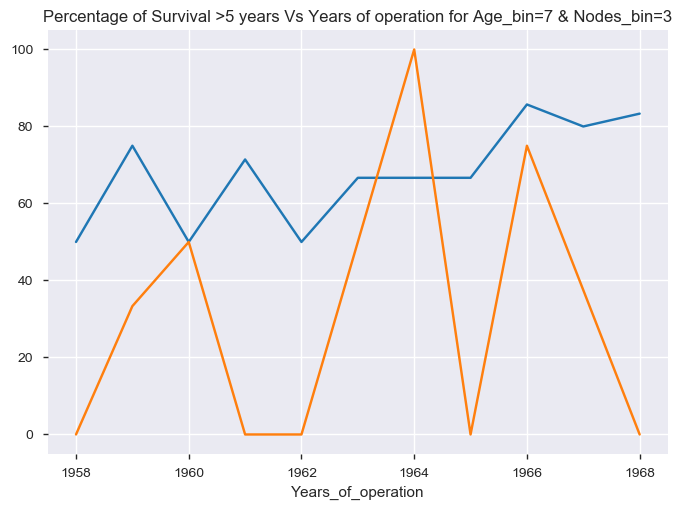

In [52]:
z = Temp2[Temp2['Age_bin']==7]
(z.groupby(['Years_of_operation'])['Status_Survived'].mean()*100).plot.line()
z = Temp2[Temp2['Nodes_bin']==3]
(z.groupby(['Years_of_operation'])['Status_Survived'].mean()*100).plot.line()
mat.title('Percentage of Survival >5 years Vs Years of operation for Age_bin=7 & Nodes_bin=3')

From the above line chart, it is understood, few critical cases operation were successful as years increasing. 
May the patient be a high profile, political, richest person and hospital have provided more focus for their survival.

<a id=section411></a>

### 4.11 Analyzing survival rate with derived column Age_Node bin

In [53]:
Temp2['Age_Node'] = Temp2['Age_bin']*Temp2['Nodes_bin'] 
Temp2.head()

,Age,Years_of_operation,Pos_axillary_nodes,Status_Survived,Status_Died,Age_bin,Nodes_bin,Age_Node
0,30,1964,1,1,0,3.0,1.0,3.0
1,30,1962,3,1,0,3.0,1.0,3.0
2,30,1965,0,1,0,3.0,1.0,3.0
3,31,1959,2,1,0,4.0,1.0,4.0
4,31,1965,4,1,0,4.0,1.0,4.0


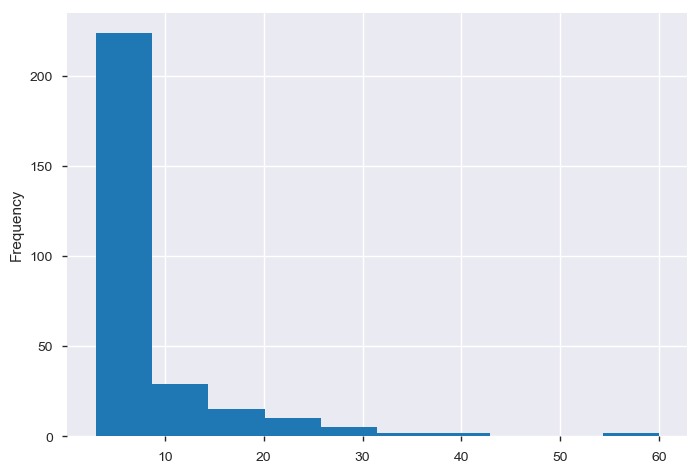

In [54]:
Temp2['Age_Node'].plot.hist()

,Status_Survived,Status_Died
Age_Node,,
3.0,3,0
4.0,26,2
5.0,51,15
6.0,53,13
7.0,32,11


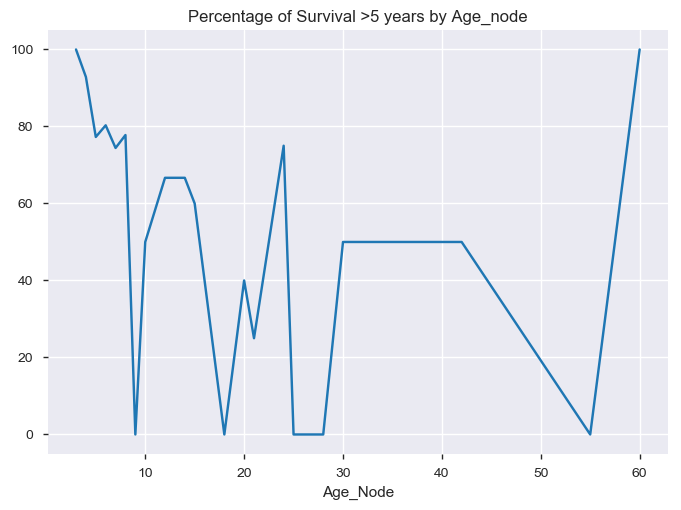

In [55]:
(Temp2.groupby(['Age_Node'])['Status_Survived'].mean()*100).plot.line()
mat.title('Percentage of Survival >5 years by Age_node')
Temp2.groupby(['Age_Node'])['Status_Survived','Status_Died'].sum().head()

Status_Survived  Status_Died
Age_Node Age_bin Nodes_bin                              
3.0      3.0     1.0                      3            0
4.0      4.0     1.0                     26            2
5.0      5.0     1.0                     51           15
6.0      6.0     1.0                     53           13
7.0      7.0     1.0                     32           11
8.0      4.0     2.0                      4            1
         8.0     1.0                     10            3
9.0      9.0     1.0                      0            1
10.0     5.0     2.0                      5            5
12.0     4.0     3.0                      3            0
         6.0     2.0                      5            4
14.0     7.0     2.0                      4            2
15.0     5.0     3.0                      3            2

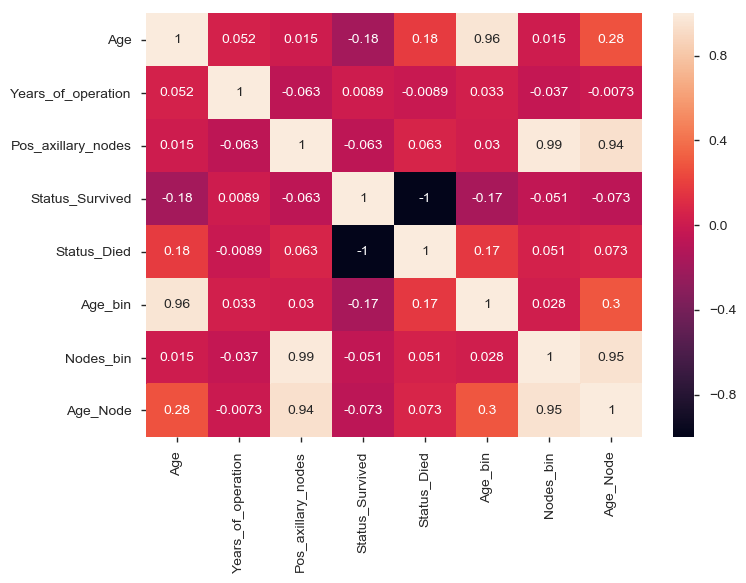

In [56]:
sns.heatmap(Temp2[Temp2['Pos_axillary_nodes']>=5].corr(), annot=True)
Temp2[Temp2['Age_Node']<=15].groupby(['Age_Node','Age_bin','Nodes_bin'])['Status_Survived','Status_Died'].sum()

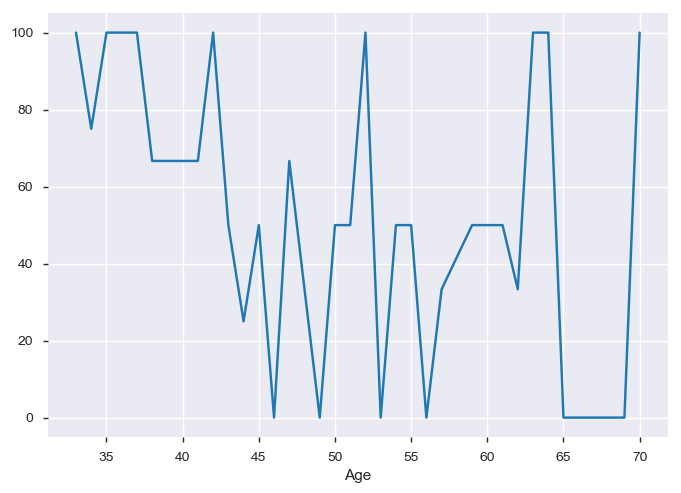

In [57]:
y=Temp2[Temp2['Pos_axillary_nodes']>=5]
(y.groupby(['Age'])['Status_Survived'].mean()*100).plot.line()

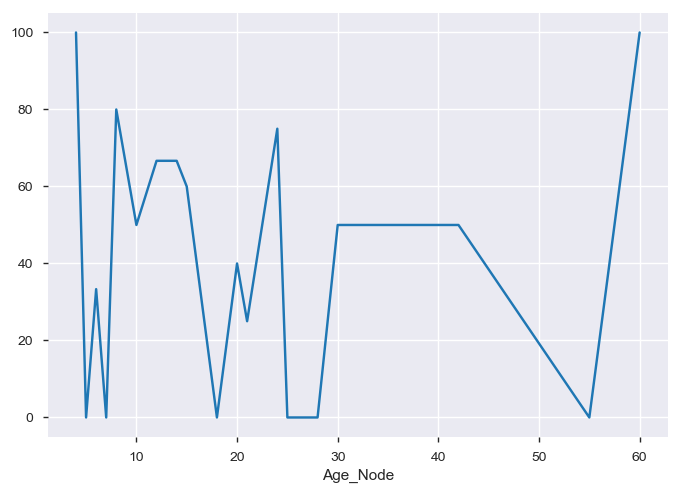

In [58]:
(y.groupby(['Age_Node'])['Status_Survived'].mean()*100).plot.line()

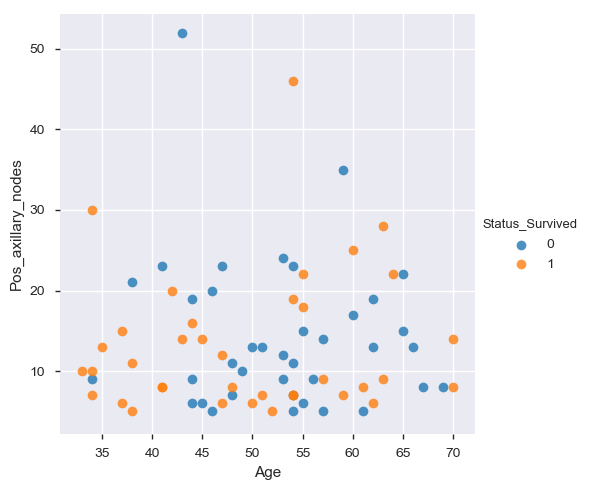

In [59]:
sns.lmplot(x='Age',y='Pos_axillary_nodes',data=y,hue='Status_Survived',fit_reg=False)

In [60]:
print('Percentage of population in Age_Node <10 is', len(Temp2[Temp2['Age_Node']<10])*100/len(Temp2),'%',
      len(Temp2[Temp2['Age_Node']<10]), 'out of', len(Temp2))
print('Percentage of patients with Age_Node <10 of survival >5 years is', 
      Temp2[Temp2['Age_Node']<10]['Status_Survived'].mean()*100, '%')

Percentage of population in Age_Node <10 is 77.85467128027682 % 225 out of 289
Percentage of patients with Age_Node <10 of survival >5 years is 79.55555555555556 %


In [61]:
print('Percentage of population in Age_Node <15 is', len(Temp2[Temp2['Age_Node']<15])*100/len(Temp2),'%',
      len(Temp2[Temp2['Age_Node']<15]), 'out of', len(Temp2))
print('Percentage of patients with Age_Node <15 of survival >5 years is', 
      Temp2[Temp2['Age_Node']<15]['Status_Survived'].mean()*100, '%')

Percentage of population in Age_Node <15 is 87.5432525951557 % 253 out of 289
Percentage of patients with Age_Node <15 of survival >5 years is 77.4703557312253 %


In [62]:
print('Percentage of population in Age_Node >=15 is', len(Temp2[Temp2['Age_Node']>=15])*100/len(Temp2),'%',
      len(Temp2[Temp2['Age_Node']>=15]), 'out of', len(Temp2))
print('Percentage of patients with Age_Node >=15 of survival >5 years is', 
      Temp2[Temp2['Age_Node']>=15]['Status_Survived'].mean()*100, '%')

Percentage of population in Age_Node >=15 is 12.456747404844291 % 36 out of 289
Percentage of patients with Age_Node >=15 of survival >5 years is 38.88888888888889 %


One more derived column __Age_Node__ is added by multiplying the Age_bin and Nodes_bin column and similar scenario observed that as __Age_Node increases__, the probability __decreases for the survival >5 years__. And the above calculation says clearly that __Age_Node <10__ have high probability for survival >5 years which is about __80%__

__This again confirms either Aged patients or patients with high positive axillary nodes have very very less chance to survive >5 years__.

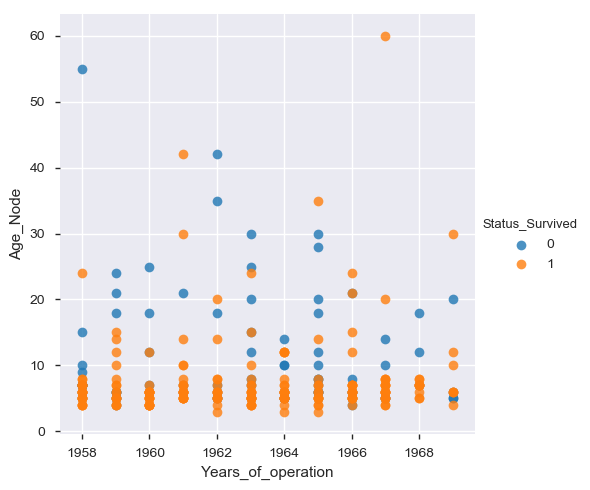

In [63]:
sns.lmplot(x='Years_of_operation',y='Age_Node',data=Temp2,hue='Status_Survived',fit_reg=False)

When __Age_Node__ and __Years_of_operation__ is plotted in scatter, it is clear that there is __no correlation__ between __Years_of_operation__ and __Survival >5 years__ except a few cases of approx 0.2%.

<a id=section5></a>

## 5. Conclusion 

- No. of cases reported with Breast Cancer have reduced as awareness increases 
- Cases identified at earlier stage with __less positive axillary nodes__ have more chances for survival >5 years. 
- __81%__ of patients survived more than 5 years who are noticed with less than 5 no. of +ve axillary nodes.
- When +ve axillary nodes identified is >=5 (Age plays a vital role), lesser the Age have better probability for the patients to survive more than 5 years.
- The __criticality increases__ and __probability decreases__ as the Age and the no. of +ve axillary nodes identified are increases which we can understand from Age_Node derived column discussed in 4.11 section